In [1]:
import numpy as np
import pandas as pd

from pandas_datareader import data as wb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
assets = ['PG','^GSPC']  
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2022-04-01,155.089996,4545.859863
2022-04-04,154.080002,4582.640137
2022-04-05,154.619995,4525.120117
2022-04-06,156.830002,4481.149902
2022-04-07,158.860001,4500.209961


<AxesSubplot:xlabel='Date'>

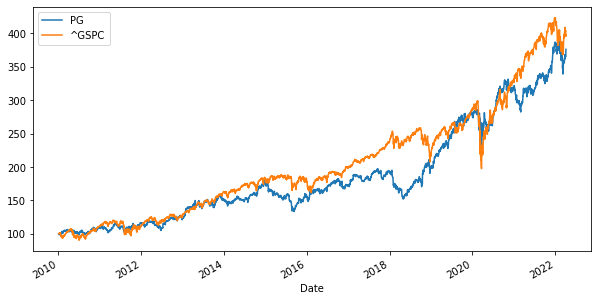

In [5]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))

In [6]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [7]:
log_returns.mean()*250

PG       0.107267
^GSPC    0.111699
dtype: float64

In [8]:
log_returns.cov()*250

,PG,^GSPC
PG,0.028878,0.016800
^GSPC,0.016800,0.029762


In [9]:
log_returns.corr()     

,PG,^GSPC
PG,1.000000,0.573037
^GSPC,0.573037,1.000000


In [10]:
#PG&GSPC are good correlated since 57%> 30%

In [11]:
num_assets = len(assets)
num_assets

2

In [17]:
weights = np.random.random(num_assets)
weights/= np.sum(weights)
weights

array([0.58834577, 0.41165423])

In [18]:
weights[0]+weights[1]

1.0

In [19]:
#Expected Portfolio Return
np.sum(weights*log_returns.mean())*250

0.10909173559104152

In [20]:
#Expected Portfolio Variance 
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.02317729887330578

In [21]:
#Expected Portfolio Volatility

In [24]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.15224092377973072

In [29]:
pfolio_returns=[]
pfolio_volatilities=[]

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns,pfolio_volatilities

(array([0.10776821, 0.11132321, 0.11059976, 0.10946945, 0.10864755,
        0.10771739, 0.10989617, 0.10965154, 0.11009343, 0.11070325,
        0.10871549, 0.10914924, 0.10791465, 0.11049991, 0.10948806,
        0.11099721, 0.11145269, 0.10728047, 0.10867622, 0.10998628,
        0.10944612, 0.10952945, 0.10930817, 0.1084044 , 0.11100873,
        0.10792446, 0.10732005, 0.10892022, 0.10904653, 0.10931757,
        0.1098497 , 0.10935087, 0.11117855, 0.11013532, 0.11113591,
        0.11041111, 0.10955487, 0.10955192, 0.10832762, 0.10840354,
        0.10784016, 0.10956281, 0.11005822, 0.11169158, 0.10865942,
        0.10953909, 0.10845109, 0.10906503, 0.10947719, 0.11016248,
        0.1077653 , 0.10762008, 0.1080983 , 0.11069988, 0.11038991,
        0.11045765, 0.11140273, 0.11000525, 0.11147692, 0.10728018,
        0.10920928, 0.10874053, 0.10960745, 0.10769878, 0.10870448,
        0.10842408, 0.10959753, 0.10805701, 0.10788224, 0.10995131,
        0.11042115, 0.11040208, 0.10981504, 0.10

In [38]:
portfolios = pd.DataFrame({'Return':pfolio_returns, 'Volatility':pfolio_volatilities})

In [39]:
portfolios.head()

,Return,Volatility
0,0.107768,0.026468
1,0.111323,0.027742
2,0.110600,0.024871
3,0.109469,0.023057
4,0.108648,0.023784


Text(0, 0.5, 'Expected Return')

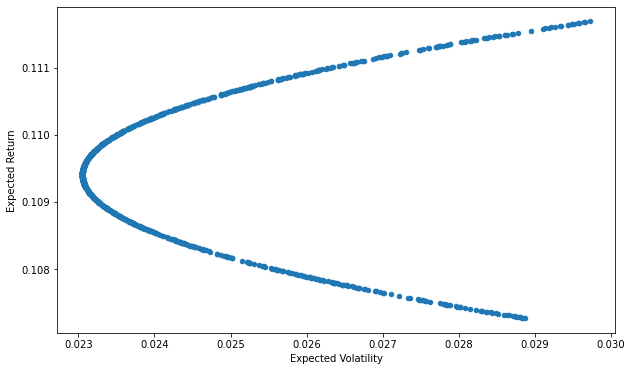

In [41]:
portfolios.plot(x='Volatility', y='Return', kind ='scatter', figsize =(10,6) );
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')